## Q4

In [58]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

def generate_circle(n_sample=100,
                    inner_radius=0.25,
                    outer_radius=1,
                    noise_level=0.1):
    angles = np.linspace(0, 2*np.pi, n_sample)
    inner = np.concatenate([inner_radius * np.cos(angles).reshape(-1, 1),
                           inner_radius * np.sin(angles).reshape(-1, 1)], axis=1)
    outer = np.concatenate([outer_radius * np.cos(angles).reshape(-1, 1),
                           outer_radius * np.sin(angles).reshape(-1, 1)], axis=1)
    return np.concatenate([inner, outer], axis=0) + np.random.normal(0, noise_level, size=(2*n_sample, 2)), np.concatenate([np.zeros(n_sample), np.ones(n_sample)])

def kernel_pca_nystrom_extension(X, samples = None, n_components=2, kernel='rbf', gamma=None):
    # Compute the kernel matrix
    if kernel == 'linear':
        K = np.dot(X, X.T)
    elif kernel == 'rbf':
        if gamma is None:
            gamma = 1 / X.shape[1]
        K = np.exp(-gamma * np.sum((X[:, np.newaxis] - X[np.newaxis, :])**2, axis=-1))
    elif kernel == 'poly':
        if gamma is None:
            gamma = 1 / X.shape[1]
        K = (np.dot(X, X.T) + gamma)**2
    elif kernel == 'sigmoid':
        if gamma is None:
            gamma = 1 / X.shape[1]
        K = np.tanh(np.dot(X, X.T) + gamma)
    else:
        raise ValueError('Invalid kernel type')
    
    # Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    if isinstance(samples, bool):
        # Compute the eigenvectors and eigenvalues of the centered kernel matrix
        eigvals, eigvecs = np.linalg.eigh(K)
    else: 
        if isinstance(samples, int):
            n1 = np.random.choice(np.arange(N), samples, replace=False)
        else:
            n1 = samples
        n2 = np.setdiff1d(np.arange(N), n1)
        sub_kernel_matrix = K[n1, :][:, n1]
        full_kernel_matrix = K[:, n1]
        approx_kernel_matrix = np.dot(np.dot(full_kernel_matrix, np.linalg.pinv(sub_kernel_matrix)), full_kernel_matrix.T)

        eigvals, eigvecs = np.linalg.eigh(approx_kernel_matrix)  
    # Sort the eigenvectors in descending order of eigenvalues
    idx = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:, idx]
    
    # Select the top n_components eigenvectors
    eigvecs = eigvecs[:, :n_components]
    eigvecs = eigvecs / np.linalg.norm(eigvecs, axis=0)
    
    # Project the data onto the eigenvectors
    X_pca = np.dot(K, eigvecs)
    return X_pca

Text(0.5, 1.0, 'two moon')

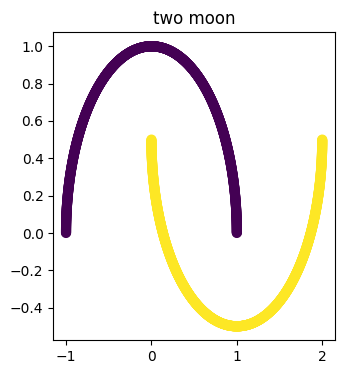

In [38]:
location, label = make_moons(n_samples=2000)
moon_data = {'location': location, 'label': label}
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(moon_data['location'][:, 0], moon_data['location'][:, 1], c=moon_data['label'], cmap=plt.cm.viridis, s=40)
plt.title('two moon')

In [59]:
X_moon_kpca = kernel_pca_nystrom_extension(moon_data['location'], samples = 500, n_components=2, kernel='rbf', gamma=20)
X_moon_kpca2 = kernel_pca_nystrom_extension(moon_data['location'], 
                                        samples = np.random.choice(np.where(moon_data['label'] == 0)[0], 500, replace=False),
                                        n_components=2, kernel='rbf', gamma=20)

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

NameError: name 'X_moon_kpca2' is not defined

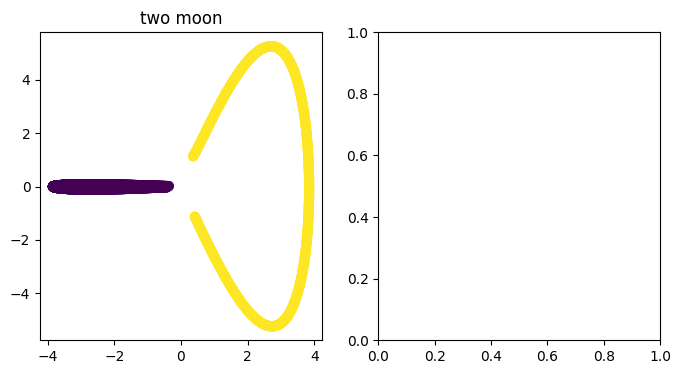

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(X_moon_kpca[:, 0], X_moon_kpca[:, 1], c=moon_data['label'], cmap=plt.cm.viridis, s=40)
plt.title('two moon')
plt.subplot(1,2,2)
plt.scatter(X_moon_kpca2[:, 0], X_moon_kpca2[:, 1], c=moon_data2['label'], cmap=plt.cm.viridis, s=40)
plt.title('two circle')
plt.savefig('kpca.png')
plt.show()


In [17]:
a = np.random.rand(6,6)


In [18]:
print(a, '\n',a[[0,1],:][:, [0,1]])

[[0.29315659 0.11801514 0.73706084 0.50666978 0.11915258 0.22490683]
 [0.67103809 0.11841423 0.73268292 0.52673727 0.59373706 0.02265477]
 [0.60150173 0.29086082 0.94959897 0.11494605 0.09346343 0.97523175]
 [0.60301665 0.22007753 0.69920929 0.14236102 0.56644167 0.96985924]
 [0.44211585 0.54894777 0.95644337 0.42437528 0.75348953 0.68622684]
 [0.0971713  0.04352469 0.369744   0.56620516 0.24107277 0.43372381]] 
 [[0.29315659 0.11801514]
 [0.67103809 0.11841423]]


In [57]:
np.random.choice(np.where(moon_data['label'] == 0)[0], 500, replace=False)

array([ 504, 1801, 1567, 1113, 1649,  829,  906,  662,  392, 1439,  818,
        633,  638,  805,  126,   86,  878,   44,   87,  634, 1164,  323,
       1876,  320, 1758,  395,  180,   19,   33, 1990,   28,  122, 1505,
        156,  133, 1462, 1788,  572, 1853, 1173,  283, 1782, 1315,  541,
       1696,  602, 1695, 1365, 1024,  198,  807, 1199, 1016, 1828,  422,
       1257, 1182, 1179,  321,  513, 1421, 1312, 1256, 1357, 1789,  348,
       1397, 1078, 1469, 1966,  194, 1663,  285,  911, 1313, 1686, 1671,
       1854, 1957,  606, 1083,   18,  841, 1595, 1510, 1262, 1624,  556,
        326, 1902, 1690,  162,   30,   22,  992, 1406, 1293,  938, 1956,
       1755,  549,  881,  996, 1376, 1220,  535,  121, 1040,   63, 1928,
        270,  671, 1522,  115,   70,  622, 1784,  373,  282,  682, 1549,
       1726, 1033,  941, 1071, 1887,  428,  341,  491,  643, 1721, 1548,
        783, 1654, 1212, 1404,  357,  947, 1013,  963, 1050,  547,  724,
       1501, 1600,  789,  185,  858,  567, 1499, 16